### Parte 6: Métricas de rendimiento

El objetivo de este fichero es mostrar las curvas de rendimiento obtenidas por el modelo entrenado para cada una de las propuestas planteadas. Primero se visualizarán todas las curvas en una misma figura para comparar sus valores y su regularidad y luego se mostrarán curvas por separado para tener una mejor comprensión del comportamiento de éstas a lo largo de todas las épocas.

##### 6.1. Métricas obtenidas:

 Propuesta 5 = ["u10_input_norm", "v10_input_norm", "pblh_input_norm","t2_input_norm","psfc_input_norm",
              "EmaxU_input_norm","EmaxV_input_norm","EminU_input_norm","EminV_input_norm",          
              "u10_target_norm", "v10_target_norm"] 

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import pickle 

%matplotlib inline

with open('historiales/historial_UNET_190824_16_80_640.75_prop1.pkl', 'rb') as file:
    history_1 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_640.75_prop2.pkl', 'rb') as file:
    history_2 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_640.75_prop3.pkl', 'rb') as file:
    history_3 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_640.75_prop_5.pkl', 'rb') as file:
    history_5 = pickle.load(file)
with open('historiales/historial_UNET_190824_16_80_640.75_prop_simple.pkl', 'rb') as file:
    history_simple = pickle.load(file)

historiales=[history_1, history_2, history_3, history_5, history_simple]
metricas=["loss", "val_loss", "mse", "val_mse", "mae", "val_mae","mape", "val_mape"]
resumen=pd.DataFrame()

for i in range(8): # #{metricas}
    valores=[]

    valores.append(historiales[0][metricas[i]][-1])
    valores.append(historiales[1][metricas[i]][-1])
    valores.append(historiales[2][metricas[i]][-1])
    valores.append(historiales[3][metricas[i]][-1])
    valores.append(historiales[4][metricas[i]][-1])

    resumen[metricas[i]]= valores

resumen= pd.concat( [resumen, pd.DataFrame([resumen.mean()])], ignore_index=True) #add promedio
resumen= pd.concat( [resumen, pd.DataFrame([resumen.std()])], ignore_index=True) #add std
resumen= resumen.rename(index={0:"1", 1:"2", 2: "3", 3:"4", 4: "5", 5: "mean", 6:"std"}) #nuevos indices
resumen

,loss,val_loss,mse,val_mse,mae,val_mae,mape,val_mape
1,0.016343,0.017627,0.000284,0.000411,0.011237,0.012069,2.556344,2.364642
2,0.015425,0.018589,0.000242,0.000571,0.010478,0.012774,2.485619,2.491010
3,0.014729,0.023790,0.000212,0.009341,0.009822,0.015540,2.347455,3.073520
4,0.015037,0.018648,0.000219,0.000682,0.009990,0.012785,2.329012,2.502473
5,0.015419,0.017965,0.000233,0.000388,0.010336,0.012206,2.461013,2.392031
mean,0.015391,0.019324,0.000238,0.002279,0.010373,0.013075,2.435888,2.564735
std,0.000542,0.002266,0.000025,0.003533,0.000492,0.001266,0.085857,0.260015


#### 6.2 Curvas para las diferentes propuestas

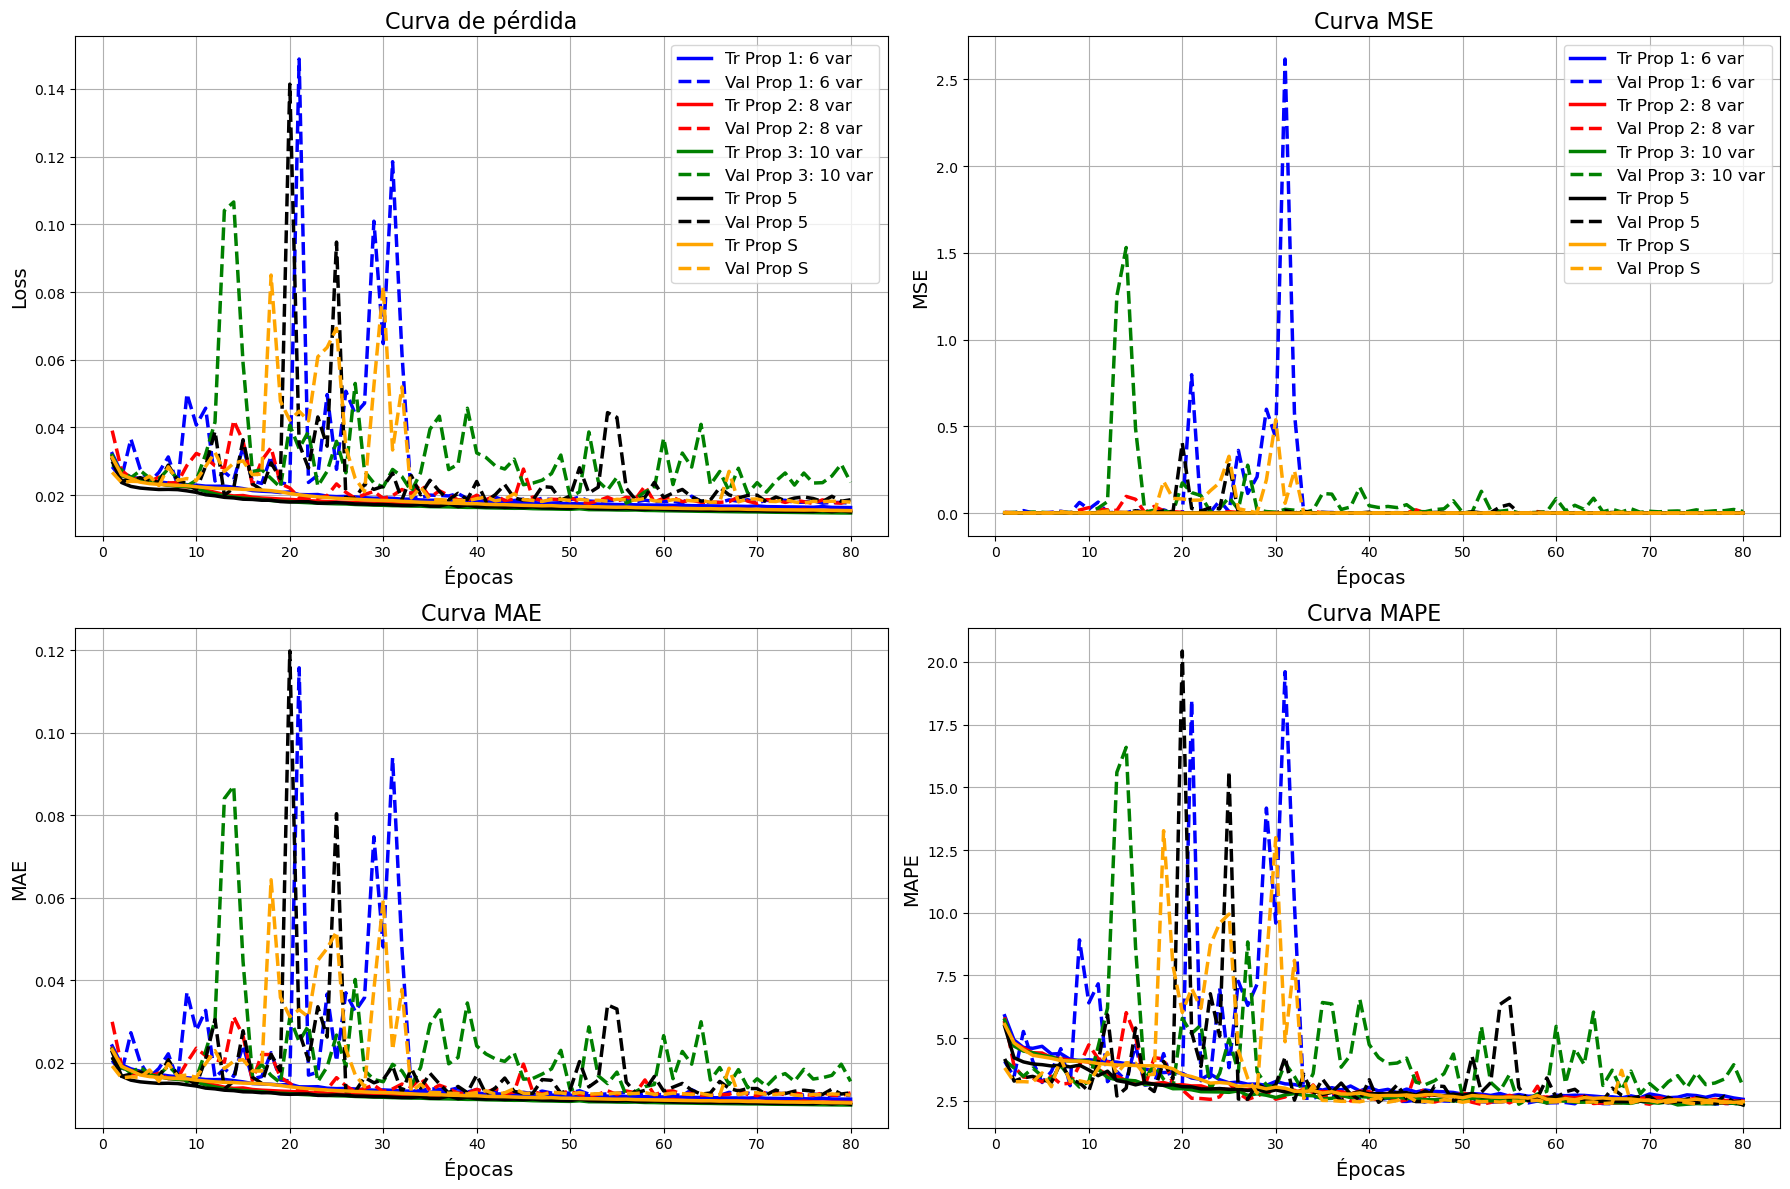

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
epochs= len(history_1['loss'])
lw=2.5

leyenda= ['Tr Prop 1: 6 var', 'Val Prop 1: 6 var', 
          'Tr Prop 2: 8 var', 'Val Prop 2: 8 var', 
          'Tr Prop 3: 10 var','Val Prop 3: 10 var',
          'Tr Prop 5','Val Prop 5 ',
          'Tr Prop S','Val Prop S ']

colores=["blue", "red", "green", "black", "orange"]
for i in range(len(historiales)):


    axs[0, 0].plot(np.arange(1,epochs+1), historiales[i]['loss'],linewidth=lw, color=colores[i], label='a')
    axs[0, 0].plot(np.arange(1,epochs+1), historiales[i]['val_loss'], linestyle='--', linewidth=lw, color=colores[i])

    axs[0, 0].legend(leyenda,fontsize=12)
    axs[0, 0].set_xlabel('Épocas ',fontsize=14)
    axs[0, 0].set_ylabel('Loss',fontsize=14)
    axs[0, 0].set_title('Curva de pérdida',fontsize=16)

    axs[0,0].grid()


    ##plot 2##
    axs[0, 1].plot(np.arange(1,epochs+1), historiales[i]['mse'],linewidth=lw, color=colores[i], label='a')
    axs[0, 1].plot(np.arange(1,epochs+1), historiales[i]['val_mse'], linestyle='--', linewidth=lw, color=colores[i])
    axs[0, 1].legend(leyenda,fontsize=12)
    axs[0, 1].set_xlabel('Épocas ',fontsize=14)
    axs[0, 1].set_ylabel('MSE',fontsize=14)
    axs[0, 1].set_title('Curva MSE',fontsize=16)
    axs[0,1].grid()

    ##plot 3##
    axs[1, 0].plot(np.arange(1,epochs+1), historiales[i]['mae'],linewidth=lw, color=colores[i], label='a')
    axs[1, 0].plot(np.arange(1,epochs+1), historiales[i]['val_mae'], linestyle='--', linewidth=lw, color=colores[i])
    axs[1, 0].set_xlabel('Épocas ',fontsize=14)
    axs[1, 0].set_ylabel('MAE',fontsize=14)
    axs[1, 0].set_title('Curva MAE',fontsize=16)
    axs[1,0].grid()

    ##plot 4##
    axs[1, 1].plot(np.arange(1,epochs+1), historiales[i]['mape'],linewidth=lw, color=colores[i], label='a')
    axs[1, 1].plot(np.arange(1,epochs+1), historiales[i]['val_mape'], linestyle='--', linewidth=lw, color=colores[i])
    axs[1, 1].set_xlabel('Épocas ',fontsize=14)
    axs[1, 1].set_ylabel('MAPE',fontsize=14)
    axs[1, 1].set_title('Curva MAPE',fontsize=16)

    axs[1,1].grid()

plt.tight_layout()
plt.show()

#### 6.3 Visualización individual

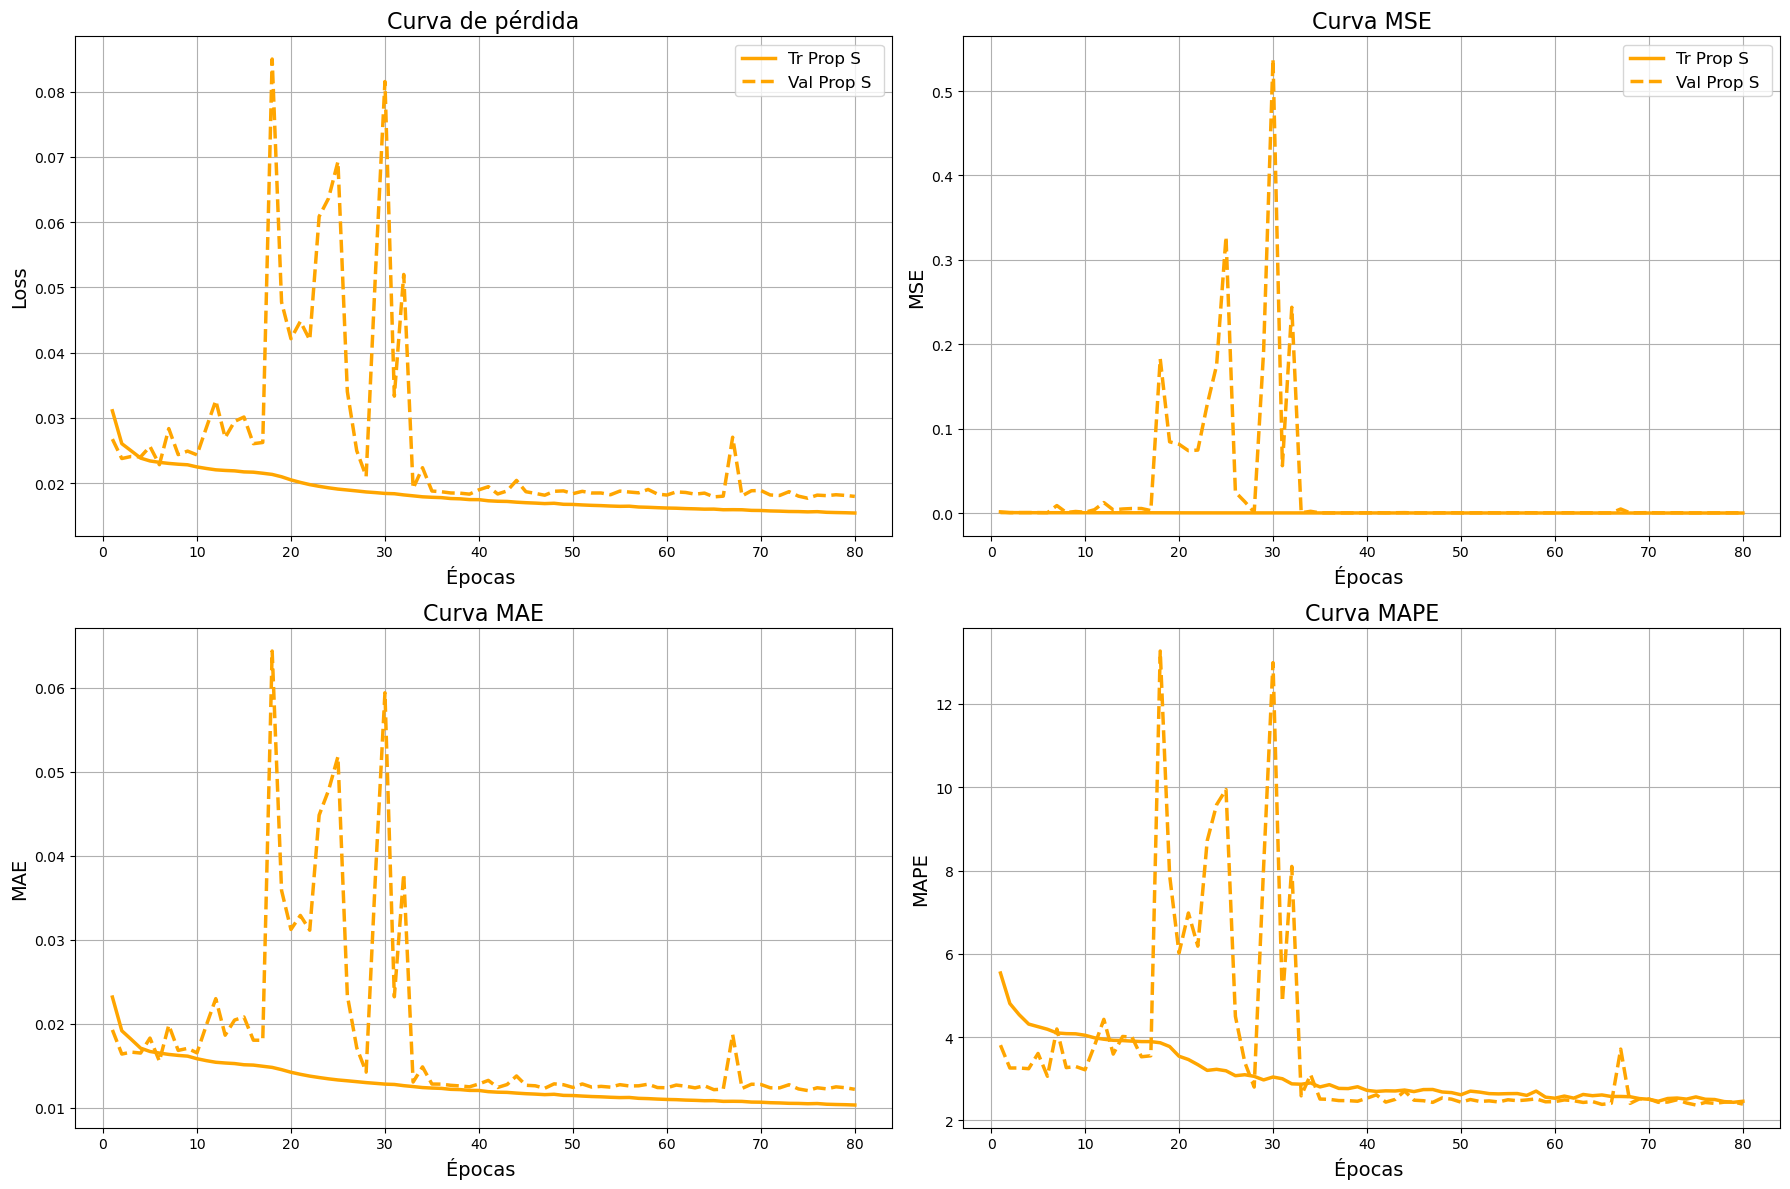

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
epochs= len(history_1['loss'])
lw=2.5
i= 4

axs[0, 0].plot(np.arange(1,epochs+1), historiales[i]['loss'],linewidth=lw, color=colores[i], label='a')
axs[0, 0].plot(np.arange(1,epochs+1), historiales[i]['val_loss'], linestyle='--', linewidth=lw, color=colores[i])

axs[0, 0].legend( [leyenda[i*2],leyenda[i*2+1]],fontsize=12)
axs[0, 0].set_xlabel('Épocas ',fontsize=14)
axs[0, 0].set_ylabel('Loss',fontsize=14)
axs[0, 0].set_title('Curva de pérdida',fontsize=16)

axs[0,0].grid()


##plot 2##
axs[0, 1].plot(np.arange(1,epochs+1), historiales[i]['mse'],linewidth=lw, color=colores[i], label='a')
axs[0, 1].plot(np.arange(1,epochs+1), historiales[i]['val_mse'], linestyle='--', linewidth=lw, color=colores[i])
axs[0, 1].legend([leyenda[i*2],leyenda[i*2+1]],fontsize=12)
axs[0, 1].set_xlabel('Épocas ',fontsize=14)
axs[0, 1].set_ylabel('MSE',fontsize=14)
axs[0, 1].set_title('Curva MSE',fontsize=16)
axs[0,1].grid()

##plot 3##
axs[1, 0].plot(np.arange(1,epochs+1), historiales[i]['mae'],linewidth=lw, color=colores[i], label='a')
axs[1, 0].plot(np.arange(1,epochs+1), historiales[i]['val_mae'], linestyle='--', linewidth=lw, color=colores[i])
axs[1, 0].set_xlabel('Épocas ',fontsize=14)
axs[1, 0].set_ylabel('MAE',fontsize=14)
axs[1, 0].set_title('Curva MAE',fontsize=16)
axs[1,0].grid()

##plot 4##
axs[1, 1].plot(np.arange(1,epochs+1), historiales[i]['mape'],linewidth=lw, color=colores[i], label='a')
axs[1, 1].plot(np.arange(1,epochs+1), historiales[i]['val_mape'], linestyle='--', linewidth=lw, color=colores[i])
axs[1, 1].set_xlabel('Épocas ',fontsize=14)
axs[1, 1].set_ylabel('MAPE',fontsize=14)
axs[1, 1].set_title('Curva MAPE',fontsize=16)

axs[1,1].grid()

plt.tight_layout()
plt.show()